# Exercise 1.2

In [1]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, RED_1

df = pd.read_csv("data/co2_annmean_mlo.csv", comment = "#")
df.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


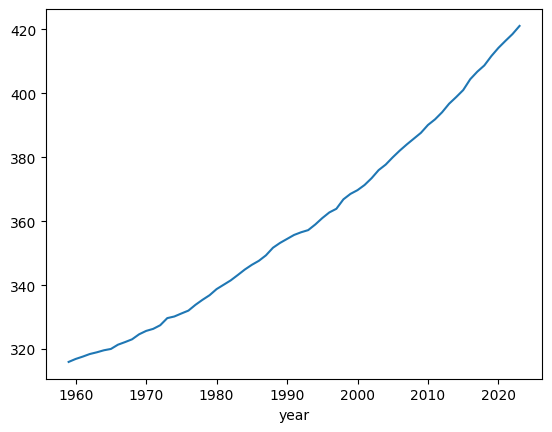

In [2]:
df_mean_CO2 = duckdb.query(
    """--sql
        SELECT
            year,
            SUM(mean) AS CO2
        FROM df
        GROUP BY year
        ORDER BY year
"""
).df()

df_mean_CO2 = df_mean_CO2.set_index("year")
df_mean_CO2

ax = df_mean_CO2["CO2"].plot()

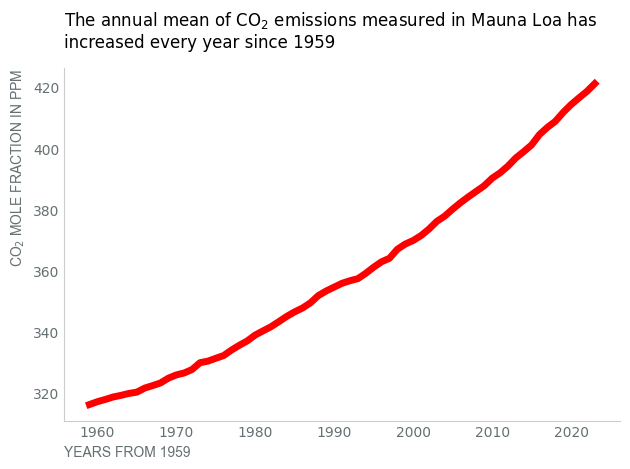

In [51]:
ax = df_mean_CO2["CO2"].plot(color=RED_1, linewidth=5)

ax.set_title(
    "The annual mean of CO$_2$ emissions measured in Mauna Loa has\nincreased every year since 1959",
    loc="left",
    pad=15
    )

ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors=GRAY_2, labelsize = 10, length=0)

ax.set_xlabel("YEARS FROM 1959", color=GRAY_2, loc="left", family="Arial")
ax.set_ylabel("CO$_2$ MOLE FRACTION IN PPM", color=GRAY_2, loc="top", family="Arial")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/annual_mean_CO2.png", dpi=300)